In [21]:
# Import library
import pandas as pd
import math
import matplotlib.pyplot as plt

In [23]:
# Section 1

# Change dimension of gyroscope to radian/s

# import data
df = pd.read_excel('./gyroscope.xls')
print(df.head())

# define sampling time, in this case is 100 Hz, or 1 / 100 or 0,01
sampling_time = 0.01

       time         x         y         z  Absolute (rad/s)
0  0.052157 -0.007019  0.006027  0.021286          0.023210
1  0.057192 -0.024063  0.008148  0.024490          0.035287
2  0.062258 -0.027267  0.000702  0.033005          0.042817
3  0.067355 -0.025131 -0.007828  0.038330          0.046498
4  0.072421 -0.024063 -0.013153  0.040466          0.048883


In [24]:
# define function to change dimenion of gyrscope
# with formula :
# gyro_angle * sampling_time
gyro_angle_func = lambda coordinate: coordinate * sampling_time

In [25]:

# perform calculation
gyro_angle_x = list(map(gyro_angle_func, df['x'].to_numpy()))
gyro_angle_y = list(map(gyro_angle_func, df['y'].to_numpy()))
gyro_angle_z = list(map(gyro_angle_func, df['z'].to_numpy()))

In [26]:
# Section 2

# Perform complementary filter calcualtion

# Step 1 - Import accelerometer dataset

df = pd.read_excel('./acceleration.xls')
print(df.head())

       time         x         y         z  Absolute acceleration (m/s^2)
0  0.045785  0.130933  0.095873  0.060942                       0.173346
1  0.050851  0.115484  0.133888  0.000463                       0.176813
2  0.055917  0.107019  0.100677  0.011741                       0.147400
3  0.060983  0.109445  0.017220  0.076094                       0.134406
4  0.066049  0.070230  0.015612  0.066681                       0.098093


In [27]:
# Setp 2 - Define accelerometer phi angle

# define accelerometer phi angle computation function
# with formula :
# arctan(Ay / sqrt(Ax^2 + Az^2))
phi_angle_func = lambda x,y,z: math.atan(y/ math.sqrt(math.pow(x, 2) + math.pow(z, 2)))

In [28]:
# perform accelerometer phi angle calculation with map and functional way
accelerometer_phi_angle = list(map(phi_angle_func, df['x'].to_numpy(), 
                                                   df['y'].to_numpy(), 
                                                   df['z'].to_numpy()))

In [29]:
# Step 3 - Perform Gait Angle calculation with complementary filter function
# formula : (gyro_angle * 0.98) + (accelerometer_phi_angle * 0.02)'
gait_angle_func = lambda gyro_angle, acc_phi_angle: (gyro_angle * 0.98) + (acc_phi_angle * 0.02)

In [30]:
# define function to mapping plot filename
map_plot_filename = lambda filename: '_'.join(list(map(str.lower, filename.split(' '))))

In [33]:
# perform complementary filter calculation with map and functional way
gait_angle_x = list(map(gait_angle_func, gyro_angle_x, accelerometer_phi_angle))
gait_angle_y = list(map(gait_angle_func, gyro_angle_y, accelerometer_phi_angle))
gait_angle_z = list(map(gait_angle_func, gyro_angle_z, accelerometer_phi_angle))

print('Gait angle at x axis \n', gait_angle_x[:10])
print('Gait angle at y axis \n', gait_angle_y[:10])
print('Gait angle at z axis \n', gait_angle_z[:10])

Gait angle at x axis 
 [0.011652137854809175, 0.016945440928545625, 0.014770503770456953, 0.002323089701249556, 0.0029607891423115537, 0.02196642690774416, 0.00361881009417899, 0.0006396393989336834, -0.0028442354958633344, -0.0025055269231430604]
Gait angle at y axis 
 [0.011779991248369375, 0.017261111704893823, 0.015044603501856574, 0.0024926636758993556, 0.003067707477275554, 0.021979436551216158, 0.0035065084584753902, 0.0003498383735148834, -0.0033949770730393345, -0.0032545534124590607]
Gait angle at z axis 
 [0.011929527381157375, 0.017421264903185622, 0.015361171494998953, 0.0029450104776075556, 0.0035931774479235536, 0.02255709463228616, 0.00413650418601139, 0.0009901520942608834, -0.0026607546609973345, -0.0025412660589250605]


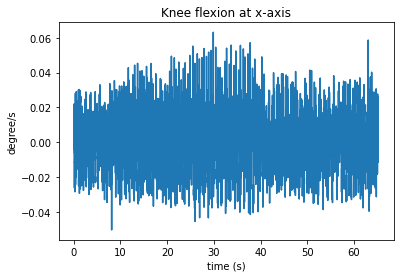

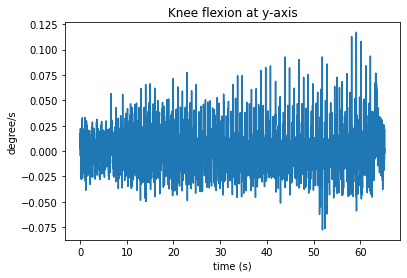

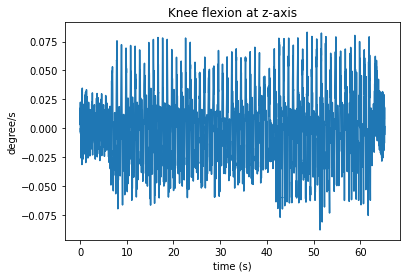

In [34]:
def plot_data(gait_angle, coordinate):
    plot_name = f'Knee flexion at {coordinate}-axis'
    plt.xlabel('time (s)')
    plt.ylabel('degree/s')
    plt.title(plot_name)
    plt.plot(df['time'].to_numpy(), gait_angle)
    plt.savefig(map_plot_filename(plot_name))
    plt.show()

plot_data(gait_angle_x, 'x')
plot_data(gait_angle_y, 'y')
plot_data(gait_angle_z, 'z')
